# Домашнее задание по статистическому анализу на python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [3]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [46]:
#df.head(10)
df.dropna()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

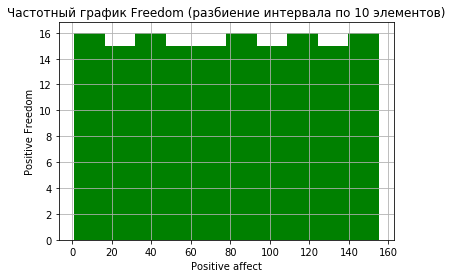

In [47]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('Positive Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
## По графику можем дать ответ, что это равномерное распределение.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [48]:
import statistics
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0


In [49]:
freedom = df['Freedom']
freedom_counts = {}
for p in freedom:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


In [50]:
print('Значение моды: ', statistics.mode(freedom))
## Посмотрел значения Freedom - они уникальны для каждой страны, мода считается не верно при "сложном" методе и не считается в одну строку.

StatisticsError: no unique mode; found 156 equally common values

In [57]:
# Математическое ожидание
statistics.mean(df.dropna()['Freedom'])

78.82857142857142

In [54]:
sum(df.dropna()['Freedom'])/len(df.dropna()['Freedom'])

78.82857142857142

In [58]:
#Стандартное отклонение
freedom = df.dropna()['Freedom']
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(freedom))

45.108971631877274


In [62]:
statistics.pstdev(freedom)

44.9475794449399

In [63]:
#Дисперсия
statistics.pvariance(freedom)

2020.2848979591836

In [13]:
min(freedom)

1.0

In [14]:
max(freedom)

155.0

In [15]:
#Выброс, предполагаю что из-за него не получалось производить расчеты (везде было "nan"). Использую df.dropna()
freedom.isnull().sum()

1

In [64]:
freedom_range = max(freedom) - min(freedom)
print(duration_range)

154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

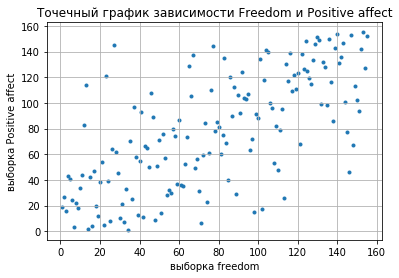

In [17]:
duration = df['Freedom']
avg_vote = df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости Freedom и Positive affect')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

In [68]:
freedom = df.dropna()['Freedom']
positive = df.dropna()['Positive affect']
corr, p_value = pearsonr(freedom, positive)
print(corr)
# Коэффициент близится к единице, а значит зависимость есть. Зависимость - выше среднего.

0.6965670458090686


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [69]:
print(statistics.mean(freedom))

78.82857142857142


In [70]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

6.496390726949487e-15


In [71]:
min(freedom_1)

-77.82857142857142

In [72]:
max(freedom_1)

76.17142857142858

Построить матрицу корреляций для всех колонок таблицы

In [73]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df.dropna()[['Freedom', 'Positive affect']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.025974  0.261438
1  0.032468  0.150327
2  0.012987  0.098039
3  0.038961  0.013072
4  0.116883  0.071895


In [74]:
freedom = df_norm[0]
pos_a = df_norm[1]

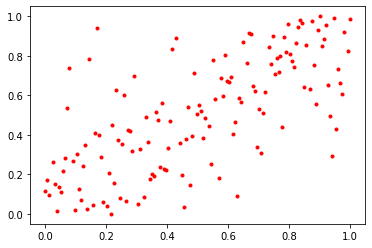

In [75]:
plt.plot(freedom, pos_a, 'r.')
plt.show()

In [76]:
corr, p_value = pearsonr(freedom, pos_a)
print(corr)

0.6965670458090686


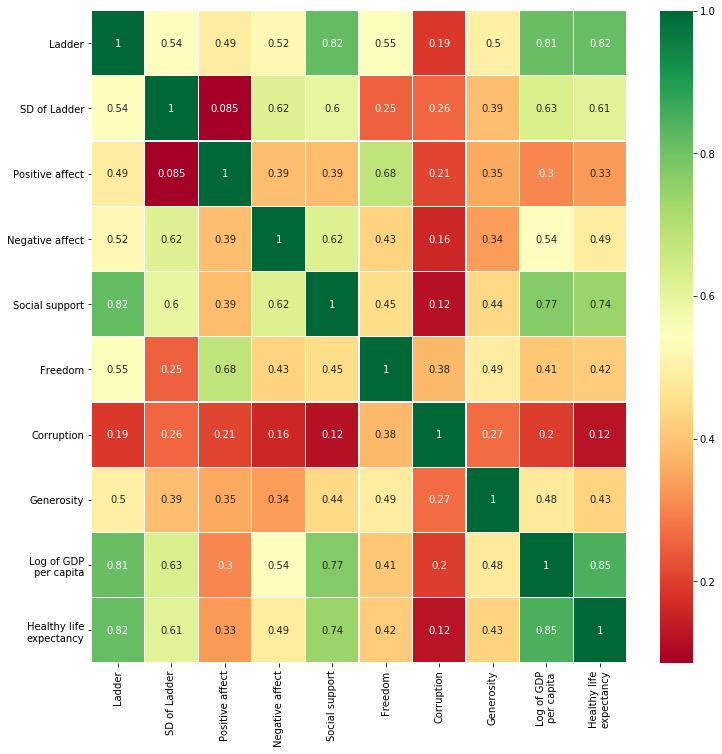

In [77]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [78]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

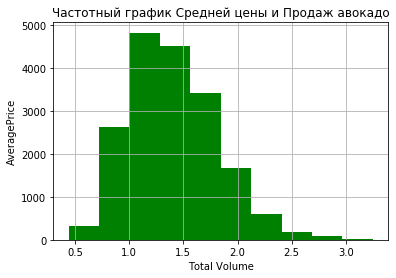

In [79]:
n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='g')

plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.title('Частотный график Средней цены и Продаж авокадо')
plt.grid(True)
plt.show()
#Нормальное распределение

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [82]:
total_4046 = df['4046']
average_price = df['AveragePrice']
corr, p_value = pearsonr(total_4046, average_price)
print(corr)

-0.20831704848788477


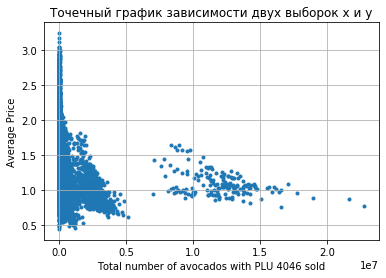

In [81]:
total_4046 = df['4046']
average_price = df['AveragePrice']
plt.xlabel('Total number of avocados with PLU 4046 sold')
plt.ylabel('Average Price')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(total_4046, average_price, marker='.')

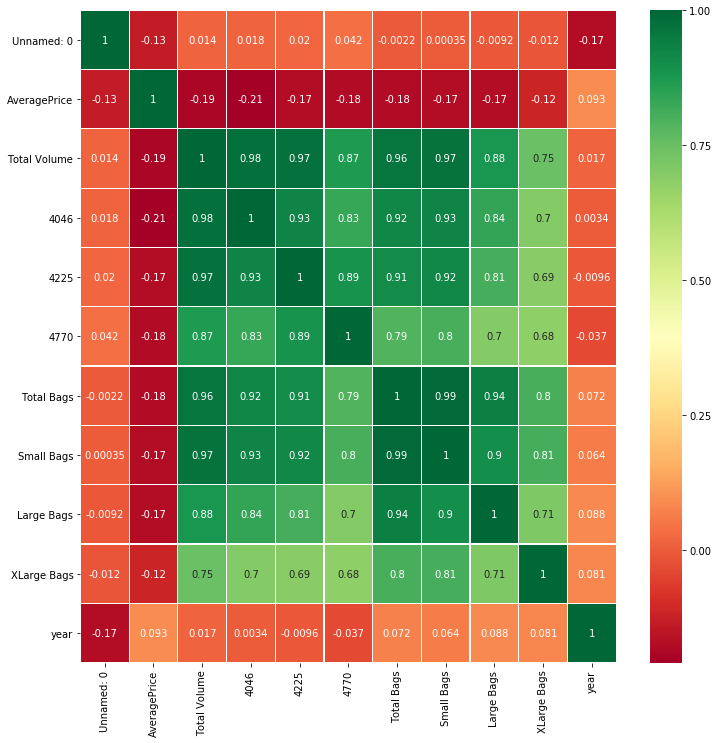

In [80]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()